In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Shop_Customers_Data.csv')
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df = pd.read_csv('Shop_Customers_Data.csv')

#exploring the dataset
print("Original Data Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

#data preview
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nRandom 5 Rows:\n", df.sample(5))

#checking for unique values
print("\nUnique Values per Column:\n", df.nunique())

#counting per column
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())

#checking for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Original Data Shape: (2000, 8)

Column Names: ['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

First 5 rows:
    CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare               

In [5]:
#Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df) * 100).round(2))

Missing values per column:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Percentage of Missing Values:
 CustomerID                0.00
Gender                    0.00
Age                       0.00
Annual Income ($)         0.00
Spending Score (1-100)    0.00
Profession                1.75
Work Experience           0.00
Family Size               0.00
dtype: float64


In [7]:
#Data cleaning
print("Original Data Shape:", df.shape)
df['Profession'] = df['Profession'].fillna('Unknown')
print("Cleaned Data Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df) * 100).round(2))
df.to_csv('Shop_Customers_Data_clean.csv', index=False)

Original Data Shape: (2000, 8)
Cleaned Data Shape: (2000, 8)

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

Percentage of Missing Values:
 CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income ($)         0.0
Spending Score (1-100)    0.0
Profession                0.0
Work Experience           0.0
Family Size               0.0
dtype: float64


In [10]:
#NumPy
ages = df['Age'].to_numpy()
scores = df['Spending Score (1-100)'].to_numpy()

print("Mean Age:", np.mean(ages))
print("Std Score:", np.std(scores).round(2))
print("Max Score:", np.max(scores))
print("Range Age:", np.ptp(ages))
print("Score Percentiles:", np.percentile(scores, [25, 50, 75]))

correlation = np.corrcoef(ages, scores)[0, 1]
print(f"Correlation between Age and Spending Score (1-100): {correlation:.2f}")

Mean Age: 48.96
Std Score: 27.93
Max Score: 100
Range Age: 99
Score Percentiles: [28. 50. 75.]
Correlation between Age and Spending Score (1-100): -0.04


In [11]:
age = df['Age'].to_numpy()
income = df['Annual Income ($)'].to_numpy()

correlation = np.corrcoef(age, income)[0, 1]
print(f"Correlation between Age and Annual Income: {correlation:.2f}")

Correlation between Age and Annual Income: 0.02


In [14]:
#Scipy
male_score = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_score = df[df['Gender'] == 'Female']['Spending Score (1-100)']

t_stat, p_val = stats.ttest_ind(male_score, female_score)
print(f"T-test between Male and Female Spending Score: t={t_stat:.2f}, p={p_val:.3f}")

T-test between Male and Female Spending Score: t=-0.02, p=0.981


In [15]:
#Statsmodels
x = sm.add_constant(df['Age'])
model = sm.OLS(df['Spending Score (1-100)'], x).fit()
print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     3.497
Date:                    Mon, 26 May 2025   Prob (F-statistic):             0.0616
Time:                            00:13:27   Log-Likelihood:                -9495.4
No. Observations:                    2000   AIC:                         1.899e+04
Df Residuals:                        1998   BIC:                         1.901e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

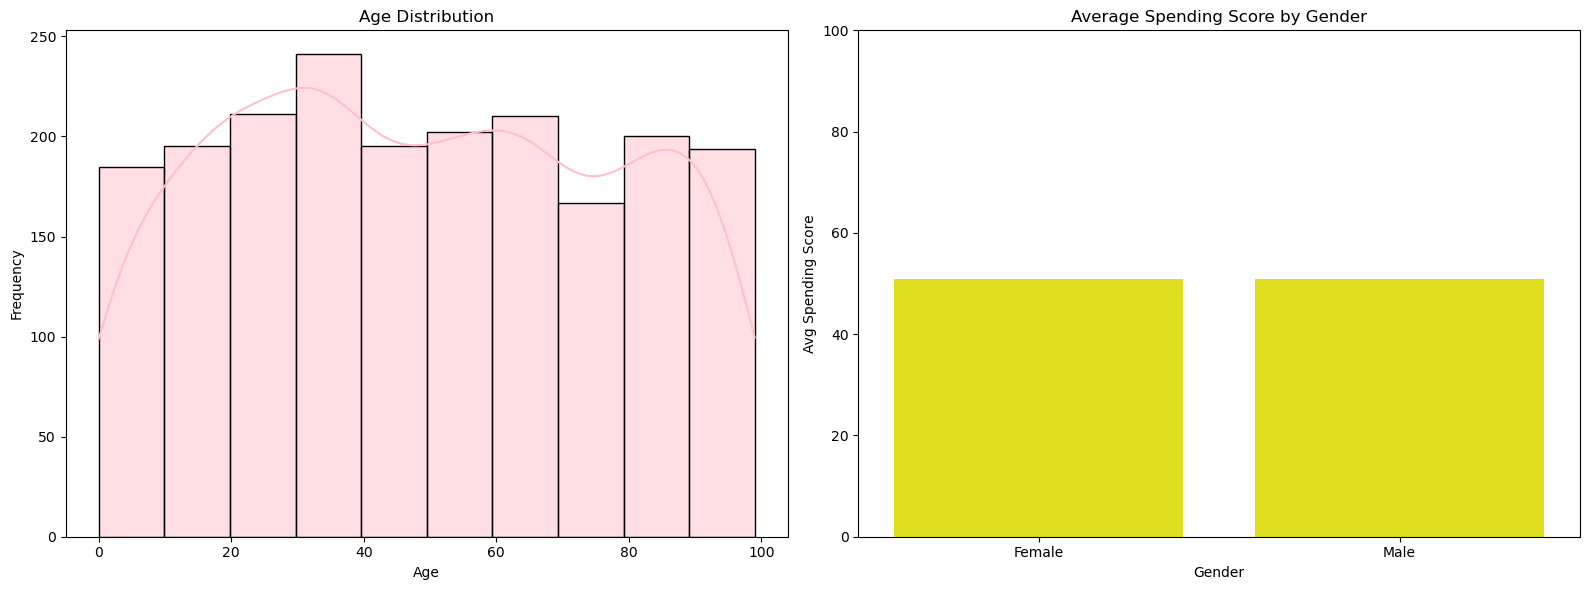

In [20]:
#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# Histogram: Age
sns.histplot(df['Age'], bins=10, kde=True, ax=ax1, color='pink')
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Boxplot: Spending Score by Gender
avg_scores = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()

sns.barplot(x='Gender', y='Spending Score (1-100)', data=avg_scores, color='yellow', ax=ax2)
ax2.set_title('Average Spending Score by Gender')
ax2.set_ylabel('Avg Spending Score')
ax2.set_ylim(0, 100) 

plt.tight_layout()
plt.show()

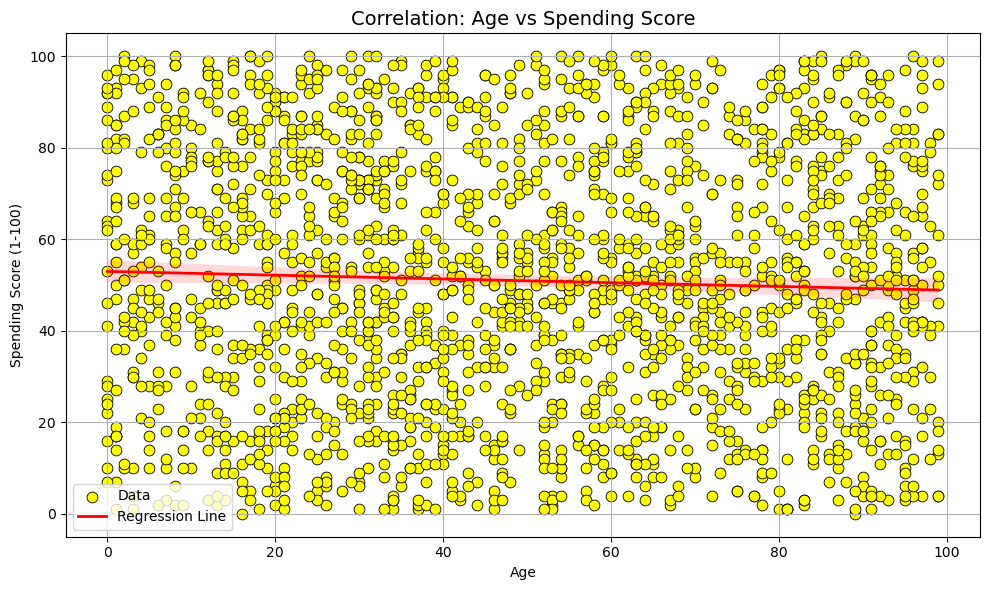

In [26]:
# Correlation Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,ax=ax,color='yellow',label='Data',edgecolor='black',s=60)
sns.regplot(x='Age',y='Spending Score (1-100)',data=df,scatter=False,ax=ax,color='red',label='Regression Line',line_kws={"linewidth": 2})

ax.set_title("Correlation: Age vs Spending Score", fontsize=14)
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score (1-100)")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
